<a href="https://colab.research.google.com/github/karankv26/CI-MCMS/blob/main/CI_MCMS(21/7/2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df=pd.read_csv("/content/FullData - Main DF.csv")

### The text below contains all the encoded values with it's meaning. 

In [58]:
TARGET_VALUES_MAP = {
    "cooler": {
        3: "close to total failure",
        20: "reduced effifiency",
        100: "full efficiency",
    },
    "valve": {
        100:"optimal switching behavior",
        90: "small lag",
        80: "severe lag",
        73: "close to total failure",
    }, 
    "leakage": {
        0: "no",
	    1: "weak",
	    2: "severe",
    },
    "accumulator": {
        130: "optimal pressure",
    	115: "slightly reduced pressure",
	    100: "severely reduced pressure",
	    90:  "close to total failure",
     },
     "stable":{
        0: "yes",
	    1: "not",
     }
}

In [59]:
df.head()

,CE,PS1,PS2,PS3,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,SE,CP,CoolerCondition,ValveCondition,InternalPumpLeakage,Hydraulic,StableFlag
0,39.601350,160.673492,109.466914,1.991475,9.842170,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,59.157183,1.862750,0,3,0,3,1
1,25.786433,160.603320,109.354890,1.976234,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,59.335617,1.255550,0,3,0,3,1
2,22.218233,160.347720,109.158845,1.972224,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,59.543150,1.113217,0,3,0,3,1
3,20.459817,160.188088,109.064807,1.946576,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,59.794900,1.062150,0,3,0,3,1
4,19.787017,160.000472,108.931434,1.922707,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,59.455267,1.070467,0,3,0,3,1


In [60]:
df.shape

(2205, 21)

In [61]:
df.columns

Index(['CE', 'PS1', 'PS2', 'PS3', 'PS5', 'PS6', 'EPS1', 'FS1', 'FS2', 'TS1',
       'TS2', 'TS3', 'TS4', 'VS1', 'SE', 'CP', 'CoolerCondition',
       'ValveCondition', 'InternalPumpLeakage', 'Hydraulic', 'StableFlag'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2204
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CE                   2205 non-null   float64
 1   PS1                  2205 non-null   float64
 2   PS2                  2205 non-null   float64
 3   PS3                  2205 non-null   float64
 4   PS5                  2205 non-null   float64
 5   PS6                  2205 non-null   float64
 6   EPS1                 2205 non-null   float64
 7   FS1                  2205 non-null   float64
 8   FS2                  2205 non-null   float64
 9   TS1                  2205 non-null   float64
 10  TS2                  2205 non-null   float64
 11  TS3                  2205 non-null   float64
 12  TS4                  2205 non-null   float64
 13  VS1                  2205 non-null   float64
 14  SE                   2205 non-null   float64
 15  CP                   2205 non-null   f

In [63]:
df.dtypes[df.dtypes=="object"]

Series([], dtype: object)

In [64]:
df.isnull().sum()

CE                     0
PS1                    0
PS2                    0
PS3                    0
PS5                    0
PS6                    0
EPS1                   0
FS1                    0
FS2                    0
TS1                    0
TS2                    0
TS3                    0
TS4                    0
VS1                    0
SE                     0
CP                     0
CoolerCondition        0
ValveCondition         0
InternalPumpLeakage    0
Hydraulic              0
StableFlag             0
dtype: int64

In [65]:
df=df.drop_duplicates() #to remove duplicates

In [66]:
df.isnull().sum()

CE                     0
PS1                    0
PS2                    0
PS3                    0
PS5                    0
PS6                    0
EPS1                   0
FS1                    0
FS2                    0
TS1                    0
TS2                    0
TS3                    0
TS4                    0
VS1                    0
SE                     0
CP                     0
CoolerCondition        0
ValveCondition         0
InternalPumpLeakage    0
Hydraulic              0
StableFlag             0
dtype: int64

In [67]:
x=df[["CE","PS1","PS2","PS3","PS5","PS6","EPS1","FS1","FS2","TS1","TS2","TS3","TS4","VS1","SE","CP"]]
y=df[["CoolerCondition"]]

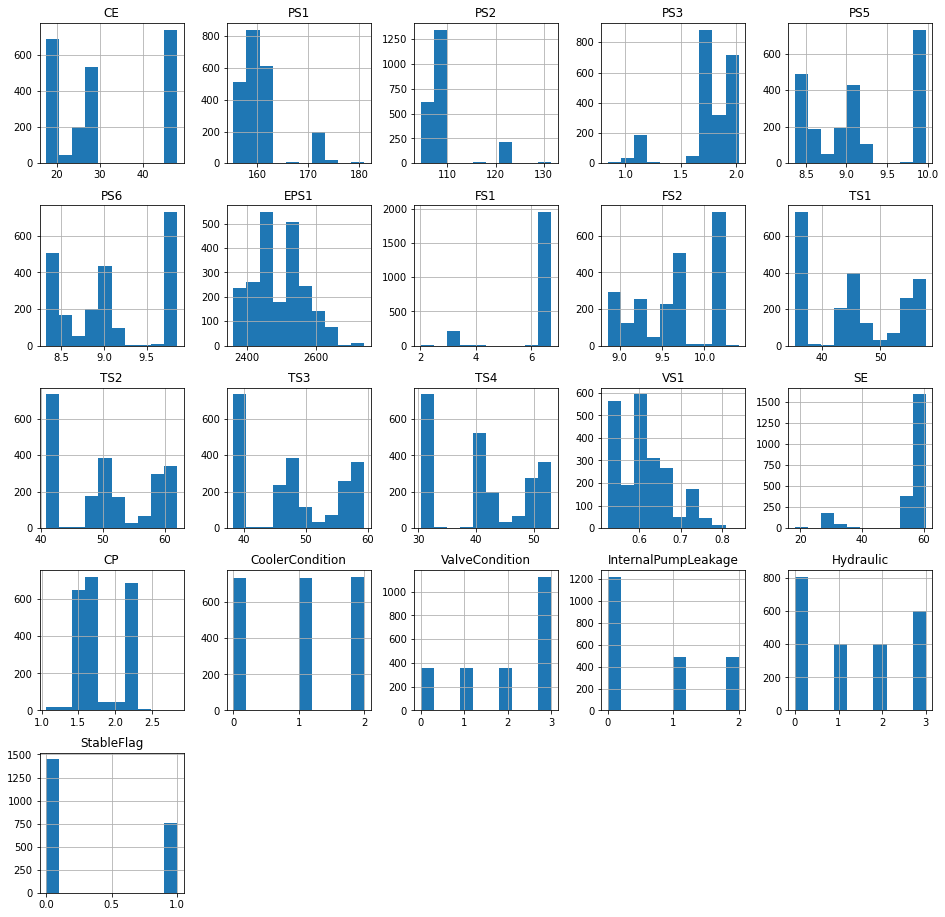

In [68]:
df.hist(figsize=(16,16),bins=10)
plt.show()

In [42]:
x

,CE,PS1,PS2,PS3,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,SE,CP
0,39.601350,160.673492,109.466914,1.991475,9.842170,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,59.157183,1.862750
1,25.786433,160.603320,109.354890,1.976234,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,59.335617,1.255550
2,22.218233,160.347720,109.158845,1.972224,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,59.543150,1.113217
3,20.459817,160.188088,109.064807,1.946576,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,59.794900,1.062150
4,19.787017,160.000472,108.931434,1.922707,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,59.455267,1.070467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,46.628517,161.227572,109.779581,2.001438,9.972037,9.850361,2543.911033,6.689930,10.184515,35.313783,40.874800,38.269267,30.404733,0.550833,59.033100,2.160600
2201,46.689817,161.206070,109.787480,1.998781,9.966184,9.844854,2543.411333,6.692182,10.177767,35.321600,40.868883,38.268250,30.416233,0.547483,59.068000,2.151450
2202,46.472300,161.192120,109.756174,1.993436,9.964329,9.842629,2542.729767,6.693277,10.176172,35.319183,40.875950,38.246367,30.426250,0.545233,59.132350,2.143300
2203,46.544967,161.208917,109.793884,2.007077,9.968232,9.846690,2544.046333,6.684128,10.178353,35.324767,40.876067,38.245733,30.414283,0.537017,58.970800,2.148483


In [43]:
y


,CoolerCondition
0,0
1,0
2,0
3,0
4,0
...,...
2200,2
2201,2
2202,2
2203,2


Next importing train_ teest_split to split the traing and validation set.

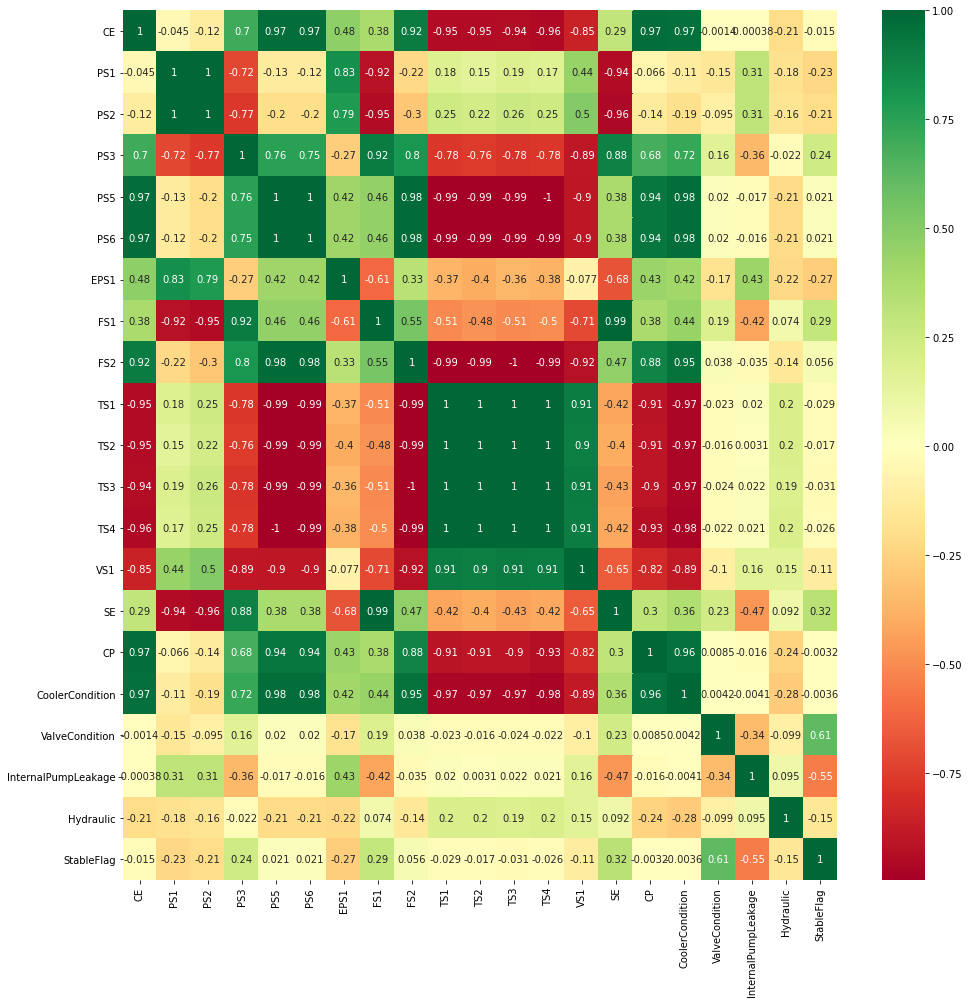

In [44]:

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [47]:
xtrain

,CE,PS1,PS2,PS3,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,SE,CP
1459,27.687850,158.972038,107.916415,1.796349,9.107254,9.023411,2457.961567,6.665183,9.718012,44.751033,49.719183,46.985667,40.306183,0.606717,59.970117,1.750383
8,18.334867,159.475745,108.529739,1.858120,9.144616,9.057067,2484.419067,6.671652,10.039710,42.891983,47.339433,44.201250,40.080533,0.567067,59.608883,1.115083
110,20.281350,157.102252,106.413856,1.725875,8.601750,8.542691,2404.362567,6.608532,9.249270,53.470100,57.943567,54.992450,48.837467,0.652433,60.412550,1.533117
449,19.680917,156.345557,105.482711,1.746749,8.467684,8.416073,2386.145400,6.598407,9.028957,56.185550,60.688000,57.642167,51.448300,0.650100,59.962800,1.506217
484,20.801817,173.449457,122.537072,1.070102,8.442340,8.394427,2646.839967,3.236720,8.997452,56.176700,59.512883,58.037300,51.372650,0.780400,28.258750,1.616417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,47.227800,160.667957,108.676167,1.907691,9.943510,9.824219,2579.523067,6.391670,10.200145,35.645767,41.231433,38.542000,30.646200,0.550767,54.718700,2.171250
106,19.673783,157.113290,106.411947,1.732708,8.606332,8.546369,2403.627800,6.620957,9.256587,53.350083,57.874650,54.897933,48.849250,0.654850,60.598150,1.508633
1403,27.406900,158.716123,107.656334,1.761988,9.169761,9.084364,2471.278700,6.453225,9.721492,44.074850,49.065933,46.314683,39.668883,0.615500,57.630200,1.740750
14,17.778833,158.985823,108.127403,1.803810,8.915401,8.840755,2461.772333,6.669133,9.856932,46.059183,50.509083,47.318267,42.798933,0.582467,60.047317,1.201867


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model1=DecisionTreeClassifier()

In [50]:
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
model1_output=model1.predict(xtest)

In [52]:
model1_output

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1,
       1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2,
       0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2,
       2, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1,
       2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0,
       1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2,
       2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
acc1=accuracy_score(model1_output,ytest)

In [55]:
acc1 #accuracy for InternalPumpLeakage

0.9977324263038548

In [56]:
model1.predict([[39.601350,160.673492,109.466914,1.991475,9.842170,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,59.157183,1.862750]])

array([0])